In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
steps = 100  
trials = 10000  
number_of_plots = 3  
plot_count = 0
results = []

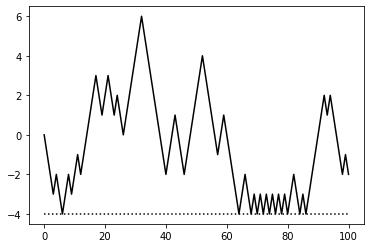

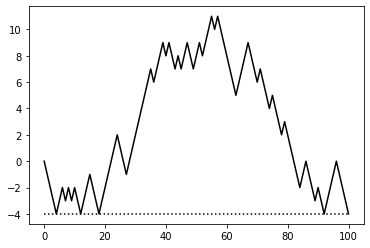

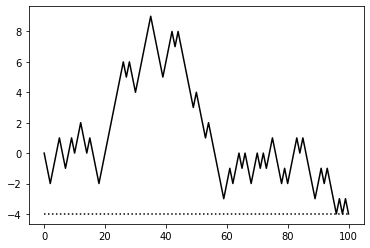

In [12]:
for _ in range(trials):
    path = [0]  # Start at 0
    for step in range(steps):
        if path[-1] == -4:  
            path.append(-3)
        else:
            path.append(path[-1] + np.random.choice([-1, 1]))
    results.append(path[-1])   
    if (-4 in path) and (plot_count < number_of_plots):
        plt.figure()
        plt.plot(path, 'k-')
        plt.plot([0, len(path) - 1], [-4, -4], 'k:')
        plot_count += 1

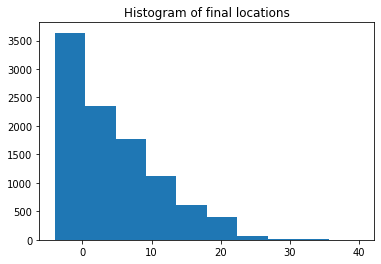

In [3]:
plt.figure()
plt.hist(results)
plt.title('Histogram of final locations')
plt.show()

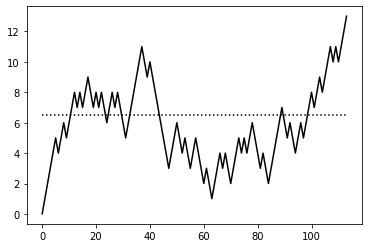

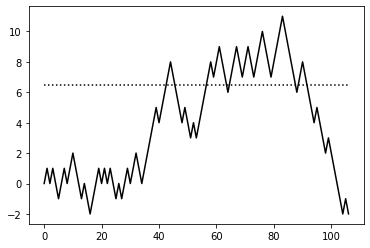

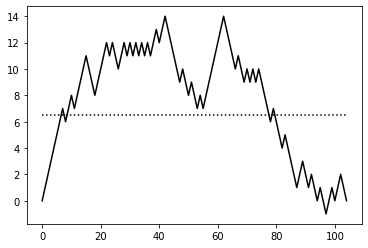

In [4]:
steps = 100  
trials = 10000 
number_of_plots = 3 

plot_count = 0
results = []
for _ in range(trials):
    path = [0]  # Start at 0
    for step in range(steps):
        if path[-1] == 6:
            path.append(5 if np.random.uniform(0, 1) < 0.75 else 7)
        if path[-1] == 7:
            path.append(8 if np.random.uniform(0, 1) < 0.75 else 6)
        else:
            path.append(path[-1] + np.random.choice([-1, 1]))
    results.append(path[-1])  

   
    if (sum(set(path[i:i+2]) == {6,7} for i in range(len(path)-1)) > 2) and (plot_count < number_of_plots):
        plt.figure()
        plt.plot(path, 'k-')
        plt.plot([0, len(path) - 1], [6.5, 6.5], 'k:')
        plot_count += 1


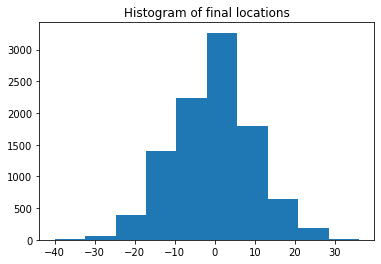

In [5]:
plt.figure()
plt.hist(results)
plt.title('Histogram of final locations')
plt.show()

In [ ]:
steps = 250  
trials = 10000 
number_of_plots = 3  

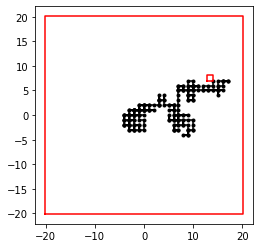

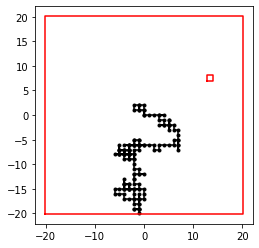

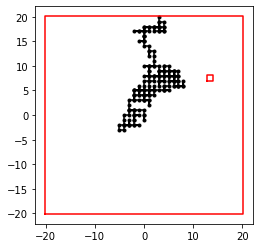

In [7]:
results = np.zeros((trials, 2), dtype=int)
plot_count = 0
boundary_count = 0
hole_count = 0
for trial in range(trials):
    path = np.zeros((steps + 1, 2), dtype=int)
    for step in range(steps):
        path[step+1] = (
            path[step] +
            [(-1, 0), (1, 0), (0, -1), (0, 1)][np.random.randint(4)])
        if (path[step+1][0] in [-20, 20]) or (path[step+1][1] in [-20, 20]):
      
            boundary_count += 1
            break
        elif (13 <= path[step+1][0] <= 14) and (7 <= path[step+1][1] <= 8):
      
            hole_count += 1
            break
    results[trial] = path[step+1]  
    if (step < steps-1) and (plot_count < number_of_plots):
     
        plt.figure()
        plt.plot( 
            path[:step + 2, 0],
            path[:step + 2, 1],
            'k.-')
        plt.plot(  
            [12.9, 12.9, 14.1, 14.1, 12.9],
            [6.9, 8.1, 8.1, 6.9, 6.9],
            'r-')
        plt.plot(  
            [-20.1, -20.1, 20.1, 20.1, -20.1],
            [-20.1, 20.1, 20.1, -20.1, -20.1],
            'r-')
        plt.axis('square')
        plot_count += 1

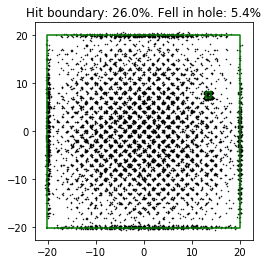

In [8]:
plt.figure()
plt.plot(
    results[:,0] + np.random.normal(0, 0.2, size=trials),
    results[:,1] + np.random.normal(0, 0.2, size=trials),
    'k.', markersize=1)
plt.plot(
    [12.9, 12.9, 14.1, 14.1, 12.9],
    [6.9, 8.1, 8.1, 6.9, 6.9],
    'g-')
plt.plot(
    [-20.1, -20.1, 20.1, 20.1, -20.1],
    [-20.1, 20.1, 20.1, -20.1, -20.1],
    'g-')
plt.axis('square')
plt.title(
    'Hit boundary: %.1f%%. Fell in hole: %.1f%%' % (
        boundary_count / trials * 100, hole_count / trials * 100))
plt.show()